In [1]:
# Calculate Plaintext frequencies from dictionary
plain_freqs = []

def calc_freq(input_str):
    freq=[0]*27
    for ch in input_str:
        if ch == ' ': freq[0] += 1
        else: freq[ord(ch) - 96] += 1
    return freq

# with open('plaintext_dictionary_test1.txt', 'r') as f:
with open('Dict1.txt', 'r') as f:
    for line in f.readlines():
        if len(line) < 30: continue
        #perform frequency analysis
        freq = calc_freq(line.strip())
        plain_freqs.append({
            'text': line.strip(),
            'freq': freq,
            'freq_s': sorted(freq)
        })
print('Dictionary Plaintext frequencies calculated')

Dictionary Plaintext frequencies calculated


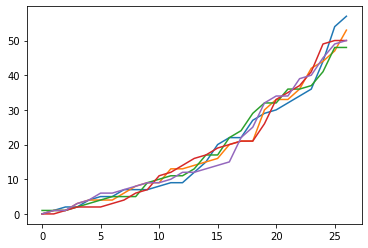

In [2]:
# Plot frequency distributions of plaintexts

import matplotlib.pyplot as plt

for ind in plain_freqs:
    plt.plot(ind['freq_s'])

plt.show()

In [3]:
# Convert character to index in i_arr
def ind(character):
    if character == ' ': return 0
    else: return ord(character) - 96

i_arr = [i for i in range(97,123)]
i_arr.insert(0,32)

In [4]:
import random

keyset=[]

# Generate random keys
for plain in range(len(plain_freqs)):
    key=[]
    for i in range(5):
        key.append(random.sample(i_arr, k=len(i_arr)))
    keyset.append(key)
print('Generated 5 random keys for each plaintext')

Generated 5 random keys for each plaintext


In [5]:
# Generate 5 sets of ciphertext for each plaintext, with different keys and noise levels
prob_of_random_ciphertext = [0.05, 0.1, 0.3, 0.5, 0.75]
cipherset=[]

for plain in range(len(plain_freqs)):
    ciphers=[]
    # print('******************\nPlain Text:\t', plain_freqs[plain]['text'])
    # print('\nCipher Texts:')
    for i in range(5):
        c=[]
        rprob = prob_of_random_ciphertext[i]
        #calculate ciphertext
        for ch in plain_freqs[plain]['text']:
            #add noise according to probability factor
            while random.random() <= rprob:
                c.append(chr(random.sample(i_arr, k=1)[0]))
            #add msg char
            c.append(chr(keyset[plain][i][ind(ch)]))
        ciphers.append(''.join(c))
        # print('\n', rprob, ':\t', ciphers[i])
    cipherset.append(ciphers)
print('Ciphertexts computed.')

Ciphertexts computed.


In [6]:
# Calculate Pearson Chi-Squared Test values for ciphertexts against all plaintexts
# https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test
# https://stats.stackexchange.com/questions/289021/statistical-test-for-comparing-two-frequency-distributions-expressed-as-arrays
# https://www.askpython.com/python/examples/chi-square-test

from scipy.stats import chi2_contingency

# chi_test_sets=[]

stat_total=0
p_total=0
mult_total=0

for ciphers in range(len(cipherset)):
    # chi_test_set=[]
    print('*******\nFor plaintext number', ciphers)
    for i in range(5): # Per ciphertext
        ct = cipherset[ciphers][i]
        chi_tests_stat=[]
        chi_tests_p=[]
        print('For CT number ', i)
        fr_ct = calc_freq(ct)
        fr_ct.sort()
        #TODO: Truncate freq to remove zeroes & ensure stability
        for plain in plain_freqs: # Calc chi_test val per plaintext
            stat, p, dof, exp = chi2_contingency([fr_ct, plain['freq_s']])
            # print(stat, p, dof, sep='\t')
            chi_tests_p.append(p)
            chi_tests_stat.append(stat)
        # Get most significant match
        match_stat = chi_tests_stat.index(max(chi_tests_stat))
        match_p = chi_tests_p.index(max(chi_tests_p))
        test_mult = [stat*p for stat, p in zip(chi_tests_stat, chi_tests_p)]
        match_mult = test_mult.index(max(test_mult))
        stat_total = stat_total + 1 if match_stat == ciphers else stat_total
        p_total = p_total + 1 if match_p == ciphers else p_total
        mult_total = stat_total + 1 if match_stat == ciphers else stat_total
        print('Closest Matches: stat:', match_stat, 'p:', match_p, 'multiplied:',match_mult)



*******
For plaintext number 0
For CT number  0
Closest Matches: stat: 3 p: 0 multiplied: 3
For CT number  1
Closest Matches: stat: 3 p: 0 multiplied: 3
For CT number  2
Closest Matches: stat: 3 p: 4 multiplied: 4
For CT number  3
Closest Matches: stat: 3 p: 1 multiplied: 1
For CT number  4
Closest Matches: stat: 3 p: 1 multiplied: 1
*******
For plaintext number 1
For CT number  0
Closest Matches: stat: 3 p: 1 multiplied: 3
For CT number  1
Closest Matches: stat: 3 p: 1 multiplied: 3
For CT number  2
Closest Matches: stat: 3 p: 1 multiplied: 1
For CT number  3
Closest Matches: stat: 3 p: 1 multiplied: 1
For CT number  4
Closest Matches: stat: 3 p: 2 multiplied: 2
*******
For plaintext number 2
For CT number  0
Closest Matches: stat: 3 p: 2 multiplied: 3
For CT number  1
Closest Matches: stat: 3 p: 2 multiplied: 3
For CT number  2
Closest Matches: stat: 3 p: 2 multiplied: 2
For CT number  3
Closest Matches: stat: 3 p: 1 multiplied: 1
For CT number  4
Closest Matches: stat: 3 p: 1 multip